# Basic image enchancment 

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image

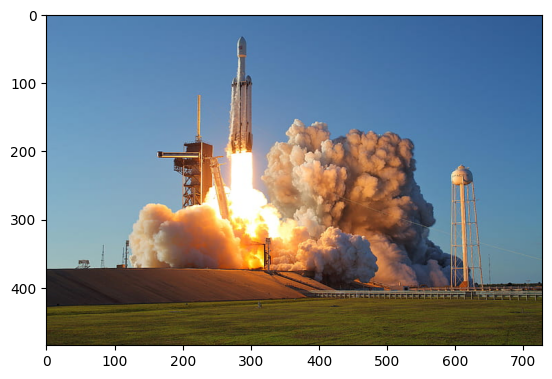

In [2]:
img = cv2.imread("falcon9.jpg", 1)
img=img[:,:,::-1]

plt.imshow(img)

## Adjust brightness (addition)

Text(0.5, 1.0, 'Dark Image')

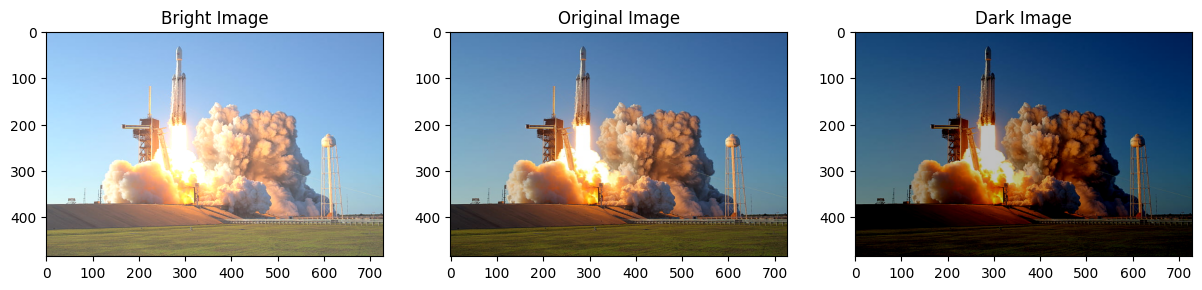

In [3]:
matrix = np.ones(img.shape, dtype="uint8") + 60

brightImage = cv2.add(img, matrix)
darkImage = cv2.subtract(img, matrix)

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(brightImage); plt.title("Bright Image")
plt.subplot(142); plt.imshow(img); plt.title("Original Image")
plt.subplot(143); plt.imshow(darkImage); plt.title("Dark Image")

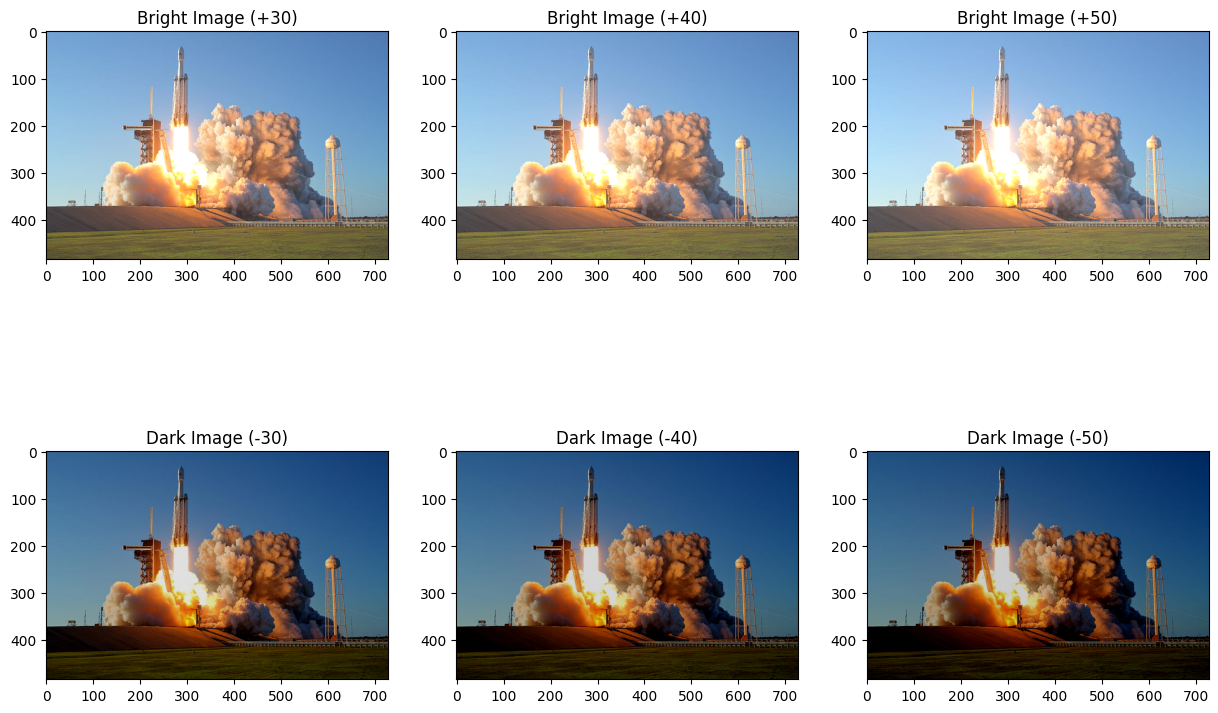

In [4]:
bright_matrix_values = [30, 40, 50]
dark_matrix_values = [30, 40, 50]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, bright_value in enumerate(bright_matrix_values):
    bright_matrix = np.ones(img.shape, dtype="uint8") + bright_value
    bright_image = cv2.add(img, bright_matrix)
    
    axes[0, i].imshow(bright_image)
    axes[0, i].set_title(f"Bright Image (+{bright_value})")


for i, dark_value in enumerate(dark_matrix_values):
    dark_matrix = np.ones(img.shape, dtype="uint8") + dark_value
    dark_image = cv2.subtract(img, dark_matrix.astype('uint8'))  # Explicitly set data type
    
    axes[1, i].imshow(dark_image)
    axes[1, i].set_title(f"Dark Image (-{dark_value})")

## Image Thresholding

- Helps to create binary segmentation
- This allows to selectively modify the portions of the image while leaving other portions intact

### Basic Idea is that pixles below a specific threashold are set to 0 and pixles above it will be set to 255

1. Binary threashold
2. Adaptive threashold

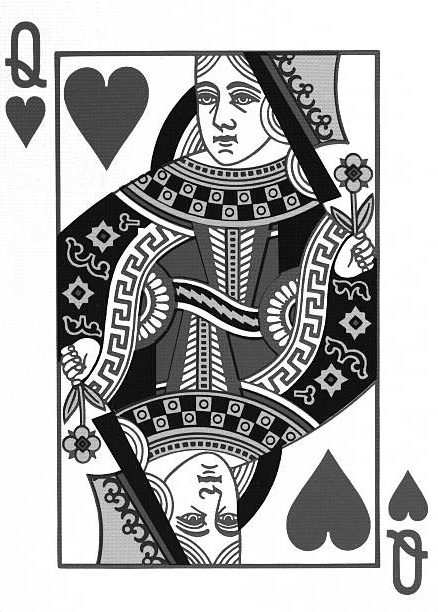

In [5]:
img = cv2.imread("qoh.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imwrite("qoh.jpg",img)
Image("qoh.jpg")

Text(0.5, 1.0, 'Original Image')

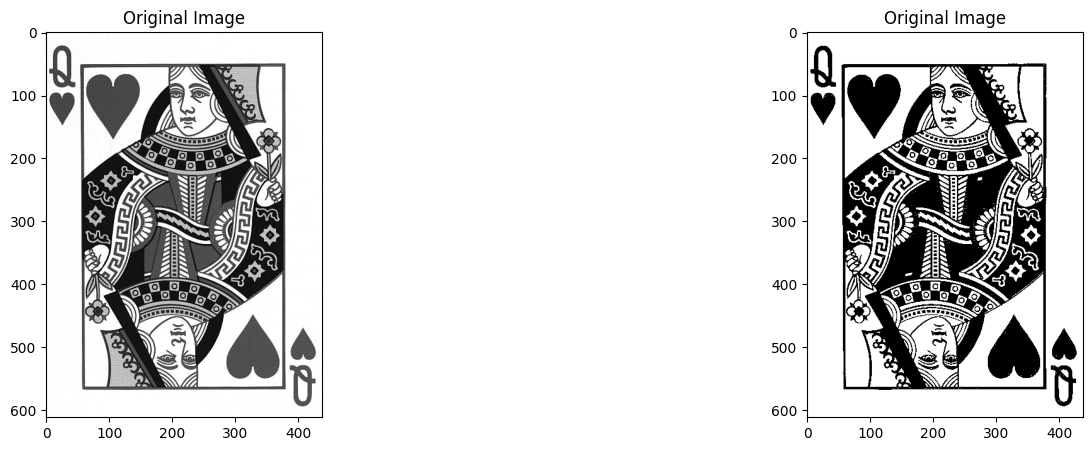

In [6]:
retreval, img_threash = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18,5])
plt.subplot(121);plt.imshow(img, cmap="gray");    plt.title("Original Image")
plt.subplot(122);plt.imshow(img_threash, cmap="gray");    plt.title("Original Image")

Text(0.5, 1.0, 'Threashold (global 150)')

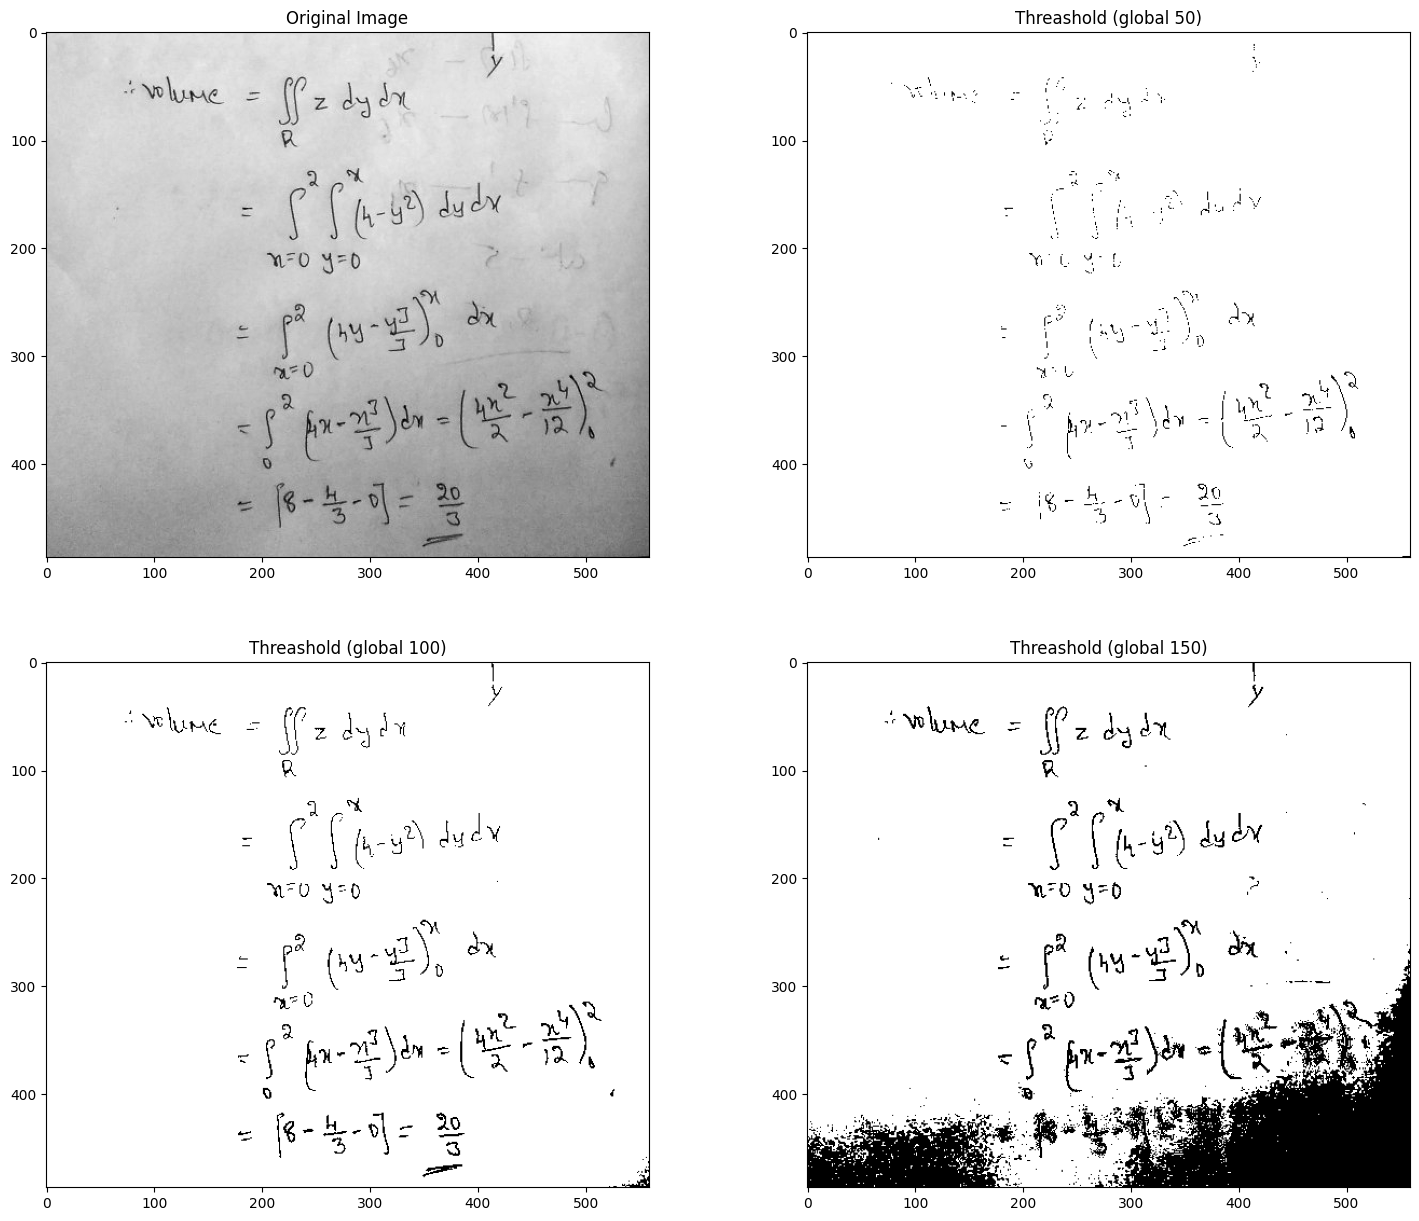

In [9]:
paper = cv2.imread("tripleIntegration.png", cv2.THRESH_BINARY)

retrival1, paper_threash50 = cv2.threshold(paper, 50, 255, cv2.THRESH_BINARY)
retrival2, paper_threash100 = cv2.threshold(paper, 100, 255, cv2.THRESH_BINARY)
retrival3, paper_threash150 = cv2.threshold(paper, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(paper, cmap="gray"); plt.title("Original Image")
plt.subplot(222); plt.imshow(paper_threash50, cmap="gray"); plt.title("Threashold (global 50)")
plt.subplot(223); plt.imshow(paper_threash100, cmap="gray"); plt.title("Threashold (global 100)")
plt.subplot(224); plt.imshow(paper_threash150, cmap="gray"); plt.title("Threashold (global 150)")

# Bitwise operations

Text(0.5, 1.0, 'Forest')

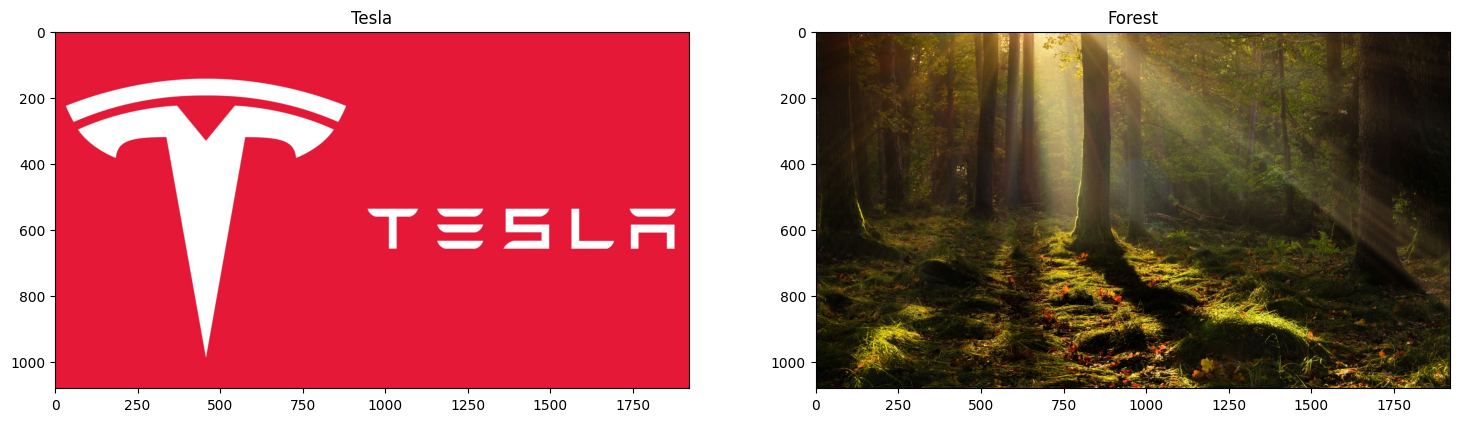

In [16]:
tesla_bgr = cv2.imread("tesla.jpg")
tesla = cv2.cvtColor(tesla_bgr, cv2.COLOR_BGR2RGB)

forest_bgr = cv2.imread("forest.jpg")
forest = cv2.cvtColor(forest_bgr, cv2.COLOR_BGR2RGB)


# aspectRatio = tesla.shape[0] / forest.shape[1]
# dim = (tesla.shape[0], int(forest.shape[0] * aspectRatio))

# forest = cv2.resize(forest,dim,interpolation=cv2.INTER_AREA)

plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(tesla); plt.title("Tesla")
plt.subplot(122); plt.imshow(forest); plt.title("Forest")

## Create mask for original image

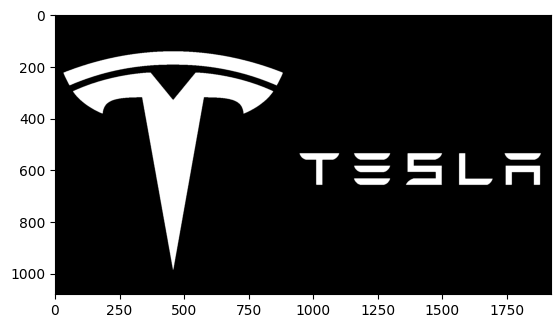

In [11]:
tesla_grey = cv2.cvtColor(tesla, cv2.COLOR_RGB2GRAY)

retval, tesla_mask = cv2.threshold(tesla_grey, 127, 255, cv2.THRESH_BINARY)

plt.imshow(tesla_mask, cmap="gray")

### Invert the mask

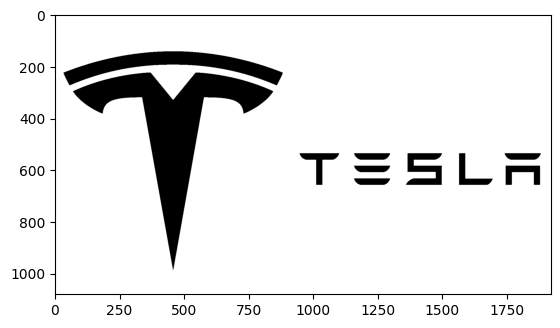

In [12]:
tesla_mask_inverted = cv2.bitwise_not(tesla_mask)
plt.imshow(tesla_mask_inverted, cmap="gray")

## Apply background to the mask

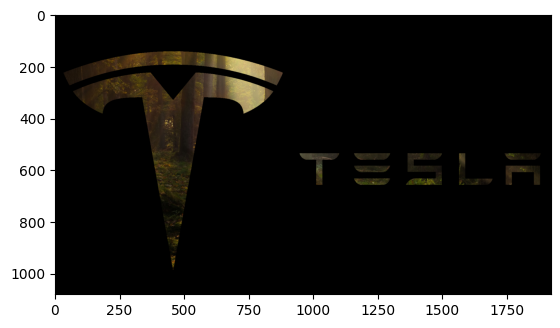

In [17]:
background = cv2.bitwise_and(forest, forest, mask=tesla_mask)

plt.imshow(background)

## Isolate foreground from the original image

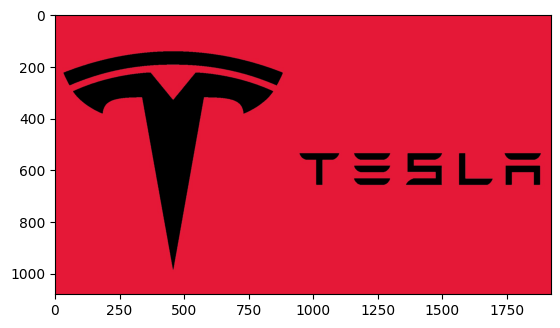

In [18]:
foreground = cv2.bitwise_and(tesla, tesla, mask=tesla_mask_inverted)
plt.imshow(foreground)

## Merge foreground and foreground

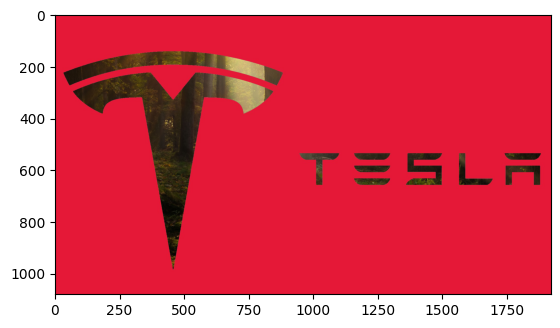

In [19]:
result = cv2.add(foreground, background)
plt.imshow(result)